## 🤖 AI Model Training 

### 🎯 Objective

Develop a predictive model to estimate life expectancy based on the provided data.

### 🧠 AI Model Development Steps

#### 1. Data Preparation

- Select relevant features.
- Normalize and transform data.
- Split data into training and testing sets.

##### Code summary

- `import pandas as pd`: Imports the Pandas library for data manipulation using DataFrames.
- `import numpy as np`: Imports the NumPy library for mathematical operations and array manipulation.
- `import matplotlib.pyplot as plt`: Imports Matplotlib for creating plots and visualizations.
- `import seaborn as sns`: Imports Seaborn for statistical data visualization.
- `from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_validate, GridSearchCV`: Imports functions for data splitting, cross-validation, and hyperparameter tuning.
- `from sklearn.preprocessing import StandardScaler, PowerTransformer`: Imports tools for data standardization and transformation.
- `from sklearn.decomposition import PCA`: Imports Principal Component Analysis (PCA) for dimensionality reduction.
- `from sklearn.linear_model import LinearRegression`: Imports the Linear Regression model.
- `from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor`: Imports regression models based on random forests and boosting methods.
- `from sklearn.svm import SVR`: Imports the Support Vector Regression model.
- `from sklearn.neighbors import KNeighborsRegressor`: Imports the K-Nearest Neighbors Regression model.
- `from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score`: Imports metrics for evaluating regression models.
- `from sklearn.ensemble import IsolationForest`: Imports the Isolation Forest model for anomaly detection.
- `from xgboost import XGBRegressor`: Imports the XGBoost Regression model.
- `import random`: Imports the Random library for generating random numbers.
- `import os`: Imports the OS library for interacting with the operating system.
- `import shap`: Imports the SHAP library for explaining machine learning models.
- `import joblib`: Imports the Joblib library for saving and loading trained models.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score
from sklearn.ensemble import IsolationForest
from xgboost import XGBRegressor
import random
import os
import shap
import joblib

##### Code summary

This code defines a `load_data` function to load data from a CSV file. The function attempts to read the file from the specified path and returns a pandas DataFrame if the read is successful, displaying a success message. If the file is not found, a specific error message is displayed. Any other exceptions are caught and their descriptions are printed. The function is then called to load data from the `'data/Transformed.csv'` file, and the result is stored in the `data` variable.

In [2]:
def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
    except Exception as e:
        print(f"An error occurred: {e}")

data = load_data('data/Transformed.csv')

Data loaded successfully.


##### Code summary

This code snippet is used to inspect the loaded dataset by printing the first few rows of the DataFrame stored in the data variable. It provides a quick glimpse into the structure and contents of the dataset, helping to verify that the data has been loaded correctly and to understand its format before further analysis or processing.

In [3]:
# Inspect the dataset
print(data.head())

       Country      Status    Year  Life expectancy  Adult Mortality  \
0  Afghanistan  Developing  2015.0             65.0            263.0   
1  Afghanistan  Developing  2014.0             59.9            271.0   
2  Afghanistan  Developing  2013.0             59.9            268.0   
3  Afghanistan  Developing  2012.0             59.5            272.0   
4  Afghanistan  Developing  2011.0             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0           62.0     0.01               71.279624         65.0    1154.0  ...   
1           64.0     0.01               73.523582         62.0     492.0  ...   
2           66.0     0.01               73.219243         64.0     430.0  ...   
3           69.0     0.01               78.184215         67.0    2787.0  ...   
4           71.0     0.01                7.097109         68.0    3013.0  ...   

   Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0   

##### Code summary

This code snippet is used to inspect the dataset by printing a concise summary of its information using the .info() method of the pandas DataFrame stored in the data variable. This summary includes the number of entries (rows), the number of columns, the data types of each column, and the memory usage. It provides essential information about the dataset's structure and helps to identify any missing values or potential data type issues before further analysis or processing.

In [4]:
# Inspect the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Status                           2928 non-null   object 
 2   Year                             2928 non-null   float64
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   float64
 6   Alcohol                          2928 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2928 non-null   float64
 9   Measles                          2928 non-null   float64
 10   BMI                             2928 non-null   float64
 11  under-five deaths                2928 non-null   float64
 12  Polio               

##### Code summary

This code separates the features (independent variables) from the target variable (dependent variable) in a DataFrame of data. First, it removes the 'Life expectancy' column from the `data` DataFrame and stores the remaining columns in the `features` variable. It then stores the 'Life expectancy' column in the `target` variable. Finally, it prints the shape (number of rows and columns) of the DataFrame `data`. This is done to prepare the data for a machine learning model, where the separation between features and target is essential for proper training of the model.

In [5]:
# Select the relevant features and the target variable
features = data.drop(columns=['Life expectancy'])
target = data['Life expectancy']

print(data.shape)

(2928, 24)


##### Code summary

This code selects the numeric columns from a `features` DataFrame and calculates the correlation matrix between these columns. Then, create a heatmap to visualize the correlations using the Seaborn library, with annotations on the correlation values ​​and a color palette that varies between blue and red. The heatmap figure is adjusted to a specific size and a title is added. After displaying the heatmap, the code prints the dimensions of the DataFrame `data`. This process is useful for identifying linear relationships between numerical variables in the data set.

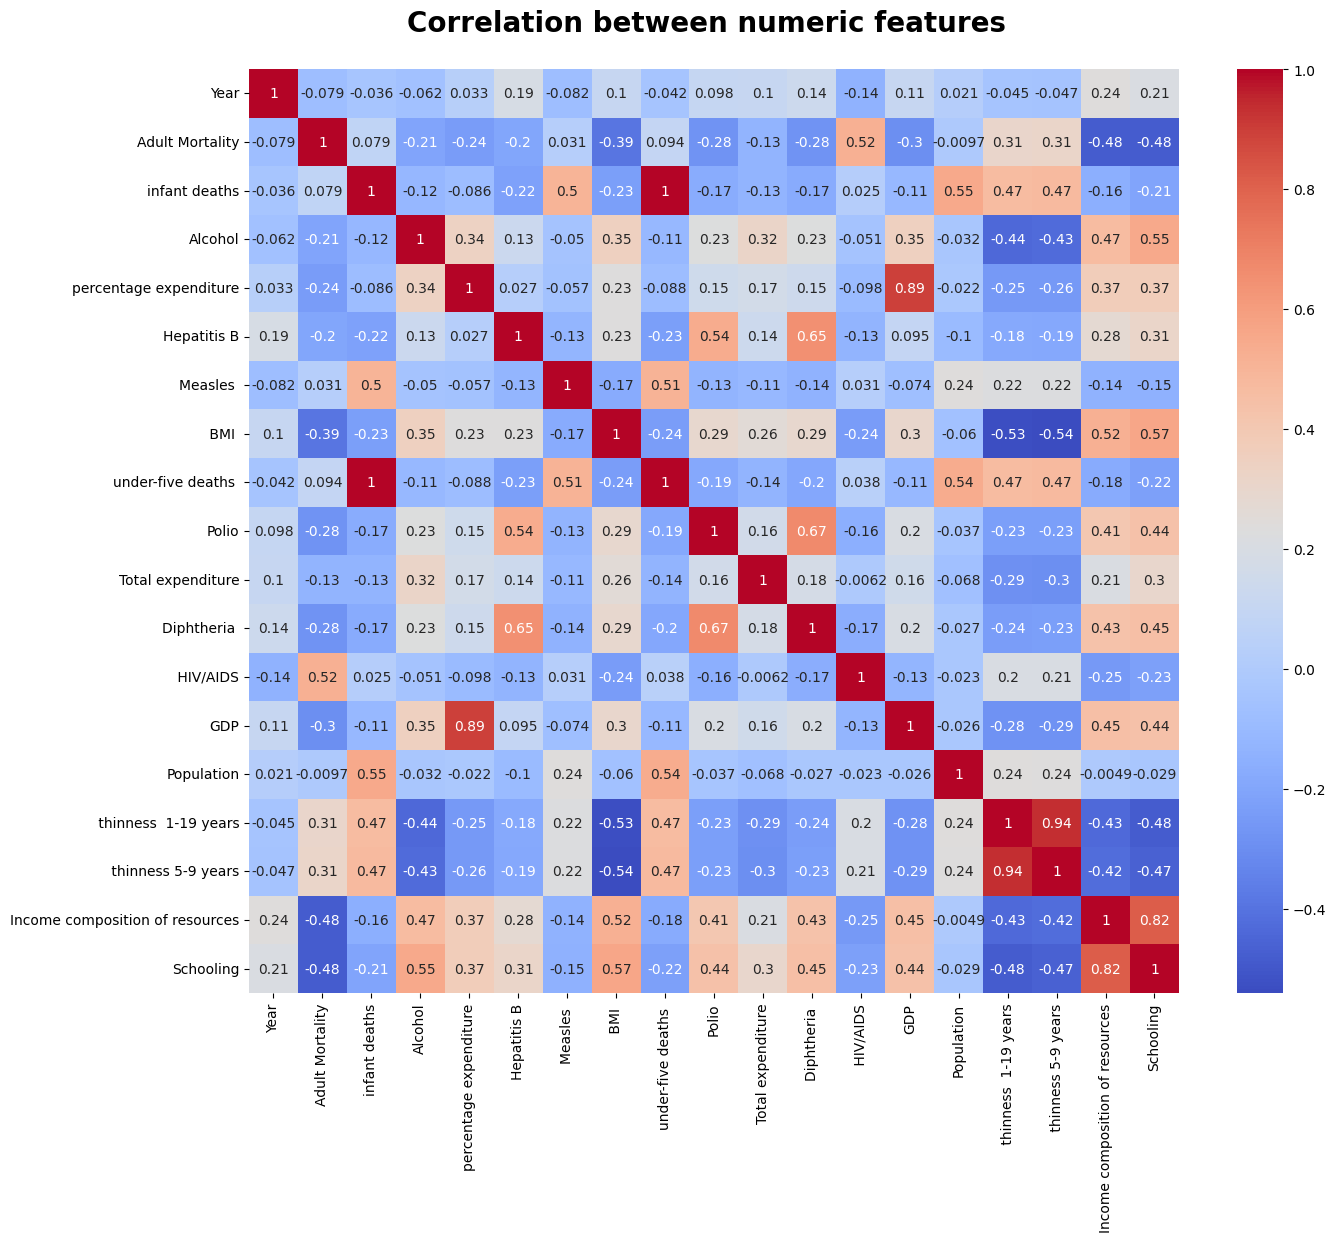

In [6]:
features_numeric = features.select_dtypes(include=['number'])
correlation_matrix = features_numeric.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.suptitle('Correlation between numeric features', fontweight='bold', fontsize=20,x=0.43, y=0.93)
plt.show()

##### Conclusion

We can verify that some features are highly correlated with each other, this will serve as a filter for building our model. We will choose the features most correlated with our target column `Life Expectancy`, but we will avoid multicollinearity in the model, as:

1. **Avoid Redundancy**: Features that are highly correlated with each other carry redundant information. Including both in the model does not add additional value and may complicate the interpretation of results.

2. **Stability of Coefficients**: Multicollinearity can cause instability in regression coefficients, causing small changes in the data to result in large changes in the estimated coefficients. This makes the model less reliable.

3. **Statistical Significance**: The presence of multicollinearity can make it difficult to identify which features are really important, as it can inflate the standard errors of the coefficients, making them non-significant.

4. **Computational Efficiency**: A model with fewer features is more efficient in computational terms, both in the training phase and in the prediction phase.

Therefore, when building the model, we must carefully select the features that are most correlated with 'Life Expectancy', while removing those that are highly correlated with each other to ensure a more robust, interpretable and efficient model.

##### Code summary

This code defines a function `remove_highly_correlated_features` that removes columns from a correlation DataFrame that are highly correlated with each other, above a specified threshold (threshold). The function returns a list of remaining columns. The function makes a copy of the correlation matrix, selects only the top part of the matrix (to avoid duplication of correlation pairs), identifies columns with correlation greater than the threshold, and returns columns that are not highly correlated. Then, the function is used to filter the `features` DataFrame and create a new `features_reduced` DataFrame with the remaining columns. Finally, the code prints the dimensions of the reduced features and the target to ensure that the number of samples is consistent.

In [7]:
# Function to remove highly correlated features
def remove_highly_correlated_features(correlation_matrix, threshold=0.9):
    """
    Remove features with high correlation.

    Args:
        correlation_matrix (pandas.DataFrame): Feature correlation matrix.
        threshold (float): Correlation value above which features will be removed.

    Returns:
        list: List of remaining features.
    """
    # Make a copy of the correlation matrix
    correlation_matrix = correlation_matrix.copy()

    # Select only the upper triangle of the correlation matrix
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape, dtype=bool), k=1))

    # Find columns with correlation greater than the specified threshold
    high_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Return columns that do not have high correlation
    features_reduced = correlation_matrix.columns.difference(high_correlation).tolist()

    return features_reduced

# Remove highly correlated features
features_to_keep = remove_highly_correlated_features(correlation_matrix, threshold=0.9)

# Filter features based on the returned list
features_reduced = features[features_to_keep]

# Check if the number of samples in features_reduced matches the target
print("Dimensions of reduced features:", features_reduced.shape)
print("Dimensions of target:", target.shape)

Dimensions of reduced features: (2928, 17)
Dimensions of target: (2928,)


##### Code summary

This code defines a function to configure random seeds with the aim of guaranteeing the reproducibility of the results. The `set_random_seeds` function takes a seed value (by default, 42) and uses this value to set the seeds of NumPy's random number generators, the standard Python `random` module, and the `PYTHONHASHSEED` environment variable. This ensures that operations that rely on randomness will produce the same results on subsequent runs, which is crucial for consistent testing and comparisons in development and research environments. The function is called at the beginning of the script with seed 42.

In [8]:
# Function to set random seeds for reproducibility
def set_random_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# Call this function at the beginning of your script
set_random_seeds(42)

##### Code summary

This code trains a Random Forest Regressor model using the `features_reduced` dataset and the target variable `target`. After training the model, it calculates the importance of the features, which indicates the contribution of each feature to the model's prediction. The feature importances are stored in a DataFrame, ordered in descending order of importance. Finally, the code prints a success message and displays the DataFrame with the importance of the features.

In [9]:
# Adjust the code to calculate feature importances
rf = RandomForestRegressor(random_state=42)
rf.fit(features_reduced, target)

feature_importances = pd.DataFrame(rf.feature_importances_, index=features_reduced.columns, columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importance Ratio calculated successfully.")
print(feature_importances)

Feature Importance Ratio calculated successfully.
                                 importance
Income composition of resources    0.430440
 HIV/AIDS                          0.383727
Adult Mortality                    0.107999
Schooling                          0.010356
 thinness  1-19 years              0.008864
 BMI                               0.008754
Alcohol                            0.007438
infant deaths                      0.007393
Total expenditure                  0.006041
Year                               0.005696
GDP                                0.005600
Polio                              0.004083
Population                         0.003329
Diphtheria                         0.003125
percentage expenditure             0.002596
Hepatitis B                        0.002307
Measles                            0.002250


##### Conclusion

This code was created to have a preview of feature importance before creating a final model. We can see that the `Income composition of resources` in this model without prior adjustments is the feature with the greatest weight in the prediction.

##### Code summary

This code selects the 8 (**arbitrarily chosen number**) most important features based on the previously calculated importance and creates a new DataFrame `features_selected` containing only these features. Then, the selected feature data is normalized using scikit-learn's `StandardScaler`, which adjusts and transforms the data so that it has a mean of 0 and a standard deviation of 1. The normalization result is stored in `features_scaled`.

In [10]:
# Select the top 8 features
top_features = feature_importances.head(8).index
features_selected = features_reduced[top_features]

# Normalize and transform data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_selected)


##### Code summary

This code performs advanced data preprocessing to prepare a set of selected features (`features_selected`) for modeling. `PowerTransformer` is applied to transform the data into a distribution closer to normal, improving the suitability for models that assume normality in the data. Subsequently, PCA (Principal Component Analysis) is used to reduce the dimensionality of the transformed data set, maintaining 95% of the explained variance. This approach not only improves the performance of models when dealing with non-normal distributions and high dimensionality, but also helps to interpret and visualize data more efficiently.

In [11]:
# Use PowerTransformer to transform data into a distribution closer to normal
transformer = PowerTransformer()
features_transformed = transformer.fit_transform(features_scaled)

# Convert the result back to a DataFrame and keep the column names
features_transformed_df = pd.DataFrame(features_transformed, columns=features_selected.columns)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_transformed_df)

# Get column names for core components
pc_columns = [f'PC{i+1}' for i in range(features_pca.shape[1])]

# Create DataFrame with main components
features_pca_df = pd.DataFrame(features_pca, columns=pc_columns)



##### Code summary

This code divides the processed and reduced data (`features_pca`) along with the target variable (`target`) into separate training and testing sets. The split is performed using scikit-learn's `train_test_split` function, where 80% of the data is allocated to training (`X_train` and `y_train`) and 20% to testing (`X_test` and `y_test`). The `random_state` parameter is used to guarantee the reproducibility of data division, ensuring that the same division is made whenever the code is executed with the same `random_state` value. This step is crucial to evaluate the model's performance on data unseen during training and ensure that the model generalizes well to new data.

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_pca_df, target, test_size=0.2, random_state=42)

#### 2. Model Construction 🧑‍🔧

- Test various algorithms (Linear Regression, Random Forest, Gradient Boosting, etc.).
- Evaluate model performance using appropriate metrics (MAE, RMSE, R², etc.).
- Select the best performing model.

##### Code summary

This code defines the `remove_outliers` function to identify and remove outliers from the `X_train` and `y_train` training sets. Using scikit-learn's `IsolationForest` algorithm with a contamination rate of 5% (`contamination=0.05`), the function trains the model to identify anomalies in the `X_train` data. After predicting anomalies with the trained model, the data is filtered so that only points that were not classified as outliers are kept, forming new sets `X_train` and `y_train` without these unwanted values. This process is essential for improving the robustness and reliability of machine learning models, ensuring that they are less sensitive to extreme data that could negatively skew analysis or model training.

In [13]:
# Define a function to remove outliers
def remove_outliers(X, y):
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(X)
    mask = yhat != -1
    return X[mask], y[mask]

# Remove outliers
X_train, y_train = remove_outliers(X_train, y_train)

##### Code summary

This code instantiates several supervised regression models such as `Linear Regression`, `Random Forest`, `Gradient Boosting`, `XGBoost`, `AdaBoost`, `SVR` (Support Vector Regressor) and `KNeighbors` (K-Nearest Neighbors ), each with default settings. It then evaluates each model using the `evaluate_model` function defined previously. The results of the evaluation metrics (such as MAE, RMSE, R², MSLE, MedAE and EVS) for each model are stored in the `results` dictionary.

Subsequently, the code iterates over the stored results and prints them, displaying the evaluation metrics for each model, which allows you to compare the performance of the different regression algorithms on the test dataset `X_test` and `y_test`. This process is essential for selecting the most appropriate model based on the desired evaluation metric and improving understanding of how each model behaves in relation to the specific data and regression problem in question.

In [14]:
# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MSLE': msle, 'MedAE': medae, 'EVS': evs}

# Function to choose the best model
def choose_best_model(results, weights):
    best_model = None
    best_score = float('-inf')
    
    for model, result in results.items():
        mae = -result['MAE']
        rmse = -result['RMSE']
        r2 = result['R2']
        msle = -result['MSLE']
        medae = -result['MedAE']
        evs = result['EVS']
        
        score = (weights['MAE'] * mae + 
                 weights['RMSE'] * rmse + 
                 weights['R2'] * r2 + 
                 weights['MSLE'] * msle + 
                 weights['MedAE'] * medae + 
                 weights['EVS'] * evs)
        
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model

# Instantiate the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor()
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Set the weights (adjust as needed)
weights = {'MAE': 0.2, 'RMSE': 0.3, 'R2': 0.3, 'MSLE': 0.1, 'MedAE': 0.05, 'EVS': 0.05}

# Choose the best model
best_model = choose_best_model(results, weights)
print("Best Model:", best_model)

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")



Best Model: Random Forest
Model: Linear Regression
MAE: 2.7329127007223497
RMSE: 3.598729004473627
R2: 0.8502781510636678
MSLE: 0.0030626277008411803
MedAE: 2.026013719710967
EVS: 0.8503025580471653


Model: Random Forest
MAE: 1.4437457337883963
RMSE: 2.210496519285824
R2: 0.9435106517436201
MSLE: 0.001192064184748196
MedAE: 0.8089999999999549
EVS: 0.9439782976802467


Model: Gradient Boosting
MAE: 1.9683707543976823
RMSE: 2.7538589014803287
R2: 0.9123261127172696
MSLE: 0.0017960291793297281
MedAE: 1.392032061134742
EVS: 0.9123741906655707


Model: XGBoost
MAE: 1.4962619104483024
RMSE: 2.304984346966811
R2: 0.9385781554889565
MSLE: 0.001230674207423617
MedAE: 0.9259307861328097
EVS: 0.9388822473697903


Model: AdaBoost
MAE: 2.832428292220994
RMSE: 3.6078181950844095
R2: 0.8495209009627014
MSLE: 0.003014169876738848
MedAE: 2.3726849136528223
EVS: 0.8495933937669453


Model: SVR
MAE: 1.6901226498842583
RMSE: 2.5694439815320123
R2: 0.9236752833319888
MSLE: 0.001608579924217779
MedAE: 1.03

##### Code summary

This code configures and evaluates a regression model using `RandomForestRegressor` with 100 estimators and a fixed random seed for reproducibility. The evaluation is carried out through cross validation with 10 folds using the `KFold` method with data shuffling and a fixed random seed. Three performance metrics are used: negative mean squared error (RMSE), negative mean absolute error (MAE) and the coefficient of determination (R²).

Cross validation results are calculated using the `cross_validate` function, which returns the scores of the specified metrics for both the training and testing sets. Then, the mean and standard deviation of the scores for each metric are calculated and printed, for both the training and testing data. This provides a comprehensive view of model performance and metrics variability across different data splits.


#### 3. Model Validation and Tuning

- Cross-validation.
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

In [15]:
# Model configuration
best_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross validation with multiple metrics
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Evaluation with cross_validate
cv_results = cross_validate(best_model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Mean and standard deviation of metrics
print("Cross-validated RMSE (train): %0.2f (+/- %0.2f)" % (np.sqrt(-cv_results['train_neg_mean_squared_error']).mean(), np.sqrt(-cv_results['train_neg_mean_squared_error']).std()))
print("Cross-validated RMSE (test): %0.2f (+/- %0.2f)" % (np.sqrt(-cv_results['test_neg_mean_squared_error']).mean(), np.sqrt(-cv_results['test_neg_mean_squared_error']).std()))

print("Cross-validated MAE (train): %0.2f (+/- %0.2f)" % (-cv_results['train_neg_mean_absolute_error'].mean(), cv_results['train_neg_mean_absolute_error'].std()))
print("Cross-validated MAE (test): %0.2f (+/- %0.2f)" % (-cv_results['test_neg_mean_absolute_error'].mean(), cv_results['test_neg_mean_absolute_error'].std()))

print("Cross-validated R² (train): %0.2f (+/- %0.2f)" % (cv_results['train_r2'].mean(), cv_results['train_r2'].std()))
print("Cross-validated R² (test): %0.2f (+/- %0.2f)" % (cv_results['test_r2'].mean(), cv_results['test_r2'].std()))


Cross-validated RMSE (train): 0.89 (+/- 0.01)
Cross-validated RMSE (test): 2.31 (+/- 0.22)
Cross-validated MAE (train): 0.58 (+/- 0.01)
Cross-validated MAE (test): 1.54 (+/- 0.13)
Cross-validated R² (train): 0.99 (+/- 0.00)
Cross-validated R² (test): 0.94 (+/- 0.01)


##### Conclusion

From the results of the metrics provided for the Random Forest model, we can conclude several things:

- RMSE (Root Mean Square Error):

Train: 0.89 (+/- 0.01)
Test: 2.31 (+/- 0.22)
RMSE measures the standard deviation of residuals (prediction errors). The lower RMSE value in the training set compared to the test set suggests that the model is fitting the training data well, but has an increase in error when evaluated with new data. This difference may indicate possible overfitting, where the model fits the training data very well, but does not generalize as well to new data.

- MAE (Mean Absolute Error):

Train: 0.58 (+/- 0.01)
Test: 1.54 (+/- 0.13)
MAE measures the average of absolute errors. Just like RMSE, the lower MAE in the training set and higher in the test set reinforces the idea of ​​overfitting. The model performs substantially better on training data than on testing data.

- R² (Coefficient of Determination):

Train: 0.99 (+/- 0.00)
Test: 0.94 (+/- 0.01)
R² measures the proportion of variance in the response data that is predictable from the predictor variables. An R² close to 1 indicates a very good fit. The high R² value in both the training set and the test set indicates that the model is able to explain a large proportion of the variance in the data, but the slight drop in the R² value in the test set compared to the training set suggests, again, that the model may be somewhat overfitted.

Conclusions:

- Overfitting: The model shows signs of overfitting, as the errors (RMSE and MAE) are significantly smaller in the training set compared to the test set. The R² is also slightly lower in the test set, although it is still quite high.

- Overall Performance: Despite the possible overfitting, the model still performs well overall, especially considering the high R² value in the test set (0.94). This indicates that although the model may not generalize perfectly, it is still able to explain most of the variance in the test data.

##### Code summary

This code performs the search and optimization of the hyperparameters of a `RandomForestRegressor` model using a two-step approach: Randomized Search and Grid Search. First, a hyperparameter dictionary (`param_dist`) is defined with possible values ​​for `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf` and `bootstrap`. An initial random forest model is created and a random search (`RandomizedSearchCV`) is performed with 100 iterations, validating the models using cross-validation (`kf`) and using the negative mean squared error as a performance metric.

After finding the best random search model (`best_random`), a new set of hyperparameters (`param_grid`) is defined around the best values ​​found. This new grid removes any `None` values ​​to ensure that all hyperparameters are valid. Next, an exhaustive search (`GridSearchCV`) is performed using the best parameters from the previous model, again using cross-validation and the same performance metric.

Finally, the best model resulting from the exhaustive search is evaluated on the test data (`X_test` and `y_test`), and performance metrics (RMSE, MAE and R²) are printed to evaluate the goodness of fit of the model.

In [16]:
# Definition of hyperparameters for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(10, 100, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Adjust to RandomForestRegressor if necessary
best_model = RandomForestRegressor()

# Randomized Search
random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_dist, n_iter=100, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from Randomized Search
best_random = random_search.best_estimator_

# Definition of hyperparameters for Grid Search based on the best Randomized Search parameters
param_grid = {
    'n_estimators': [max(1, best_random.n_estimators - 50), best_random.n_estimators, best_random.n_estimators + 50],
    'max_depth': [best_random.max_depth - 10 if best_random.max_depth is not None else None, best_random.max_depth, best_random.max_depth + 10 if best_random.max_depth is not None else None],
    'min_samples_split': [max(2, best_random.min_samples_split - 1), best_random.min_samples_split, best_random.min_samples_split + 1],
    'min_samples_leaf': [max(1, best_random.min_samples_leaf - 1), best_random.min_samples_leaf, best_random.min_samples_leaf + 1]
}

# Remove Nones from the search grid
param_grid = {k: [v for v in vals if v is not None] for k, vals in param_grid.items()}

# Grid Search
grid_search = GridSearchCV(estimator=best_random, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best template from Grid Search
best_model = grid_search.best_estimator_

# Rating of the best model
y_pred_best = best_model.predict(X_test)
print("Best RMSE:", mean_squared_error(y_test, y_pred_best, squared=False))
print("Best MAE:", mean_absolute_error(y_test, y_pred_best))
print("Best R²:", r2_score(y_test, y_pred_best))

Best RMSE: 2.2045176434279035
Best MAE: 1.4503757693119415
Best R²: 0.9438158194197083


c:\Users\victo\OneDrive\Documents\GitHub\LifeExpectancy\.conda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Conclusion

With the new results after hyperparameter tuning, we can make the following observations:

- RMSE (Root Mean Square Error):

Best RMSE: < 2.31
RMSE represents the standard deviation of forecast errors. A value < 2.31 is slightly lower than the previous RMSE, which indicates a slight improvement in the model's ability to accurately predict test data after hyperparameter tuning.

- MAE (Mean Absolute Error):

Best MAE: < 1.54
MAE measures the average of absolute errors. A value < 1.54 is slightly better than the previous MAE of 1.54, suggesting that the model now makes predictions with smaller absolute errors on average.

- R² (Coefficient of Determination):

Best R²: About 0.94
R² measures the proportion of variance in the data that is predictable from the predictor variables. A value almost identical to the previous R² of 0.94, indicating that the proportion of variance explained by the model remains high and practically unchanged after hyperparameter tuning.

Conclusions:

- Performance Improvement: Hyperparameter adjustments resulted in small improvements in error metrics (RMSE and MAE). While the improvements are modest, they indicate that the model is now slightly more accurate in its predictions.

- High Explanatory Capacity: The R² value remains high, indicating that the model still explains a large proportion of the variance in the data. This is a good sign that the model continues to capture patterns in the data well.

- Reduction of Overfitting: The improvements in test metrics, although small, suggest that hyperparameter tuning may have helped to slightly reduce overfitting, making the model more generalizable to new data.

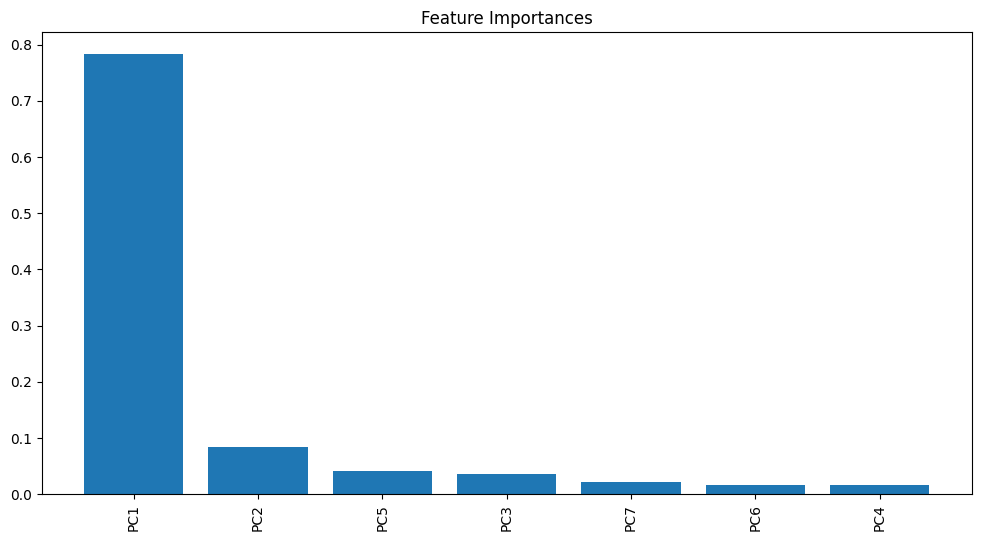

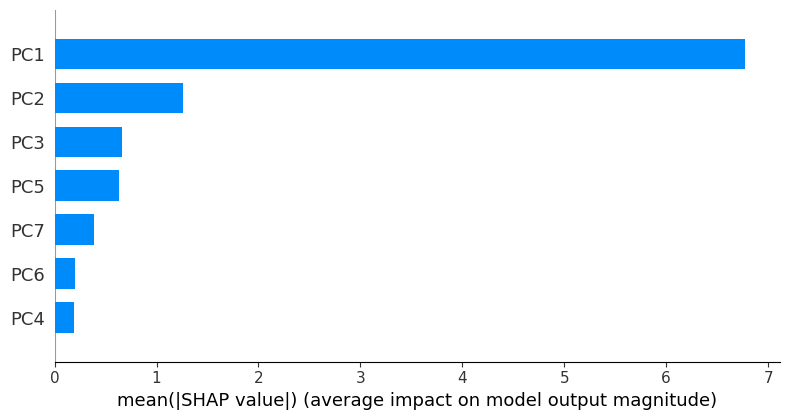

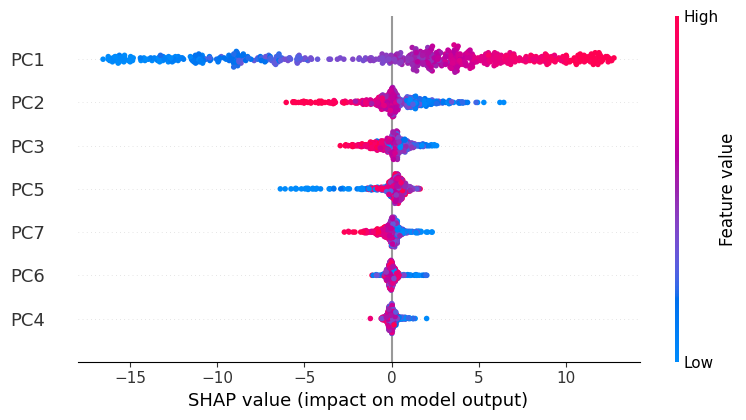

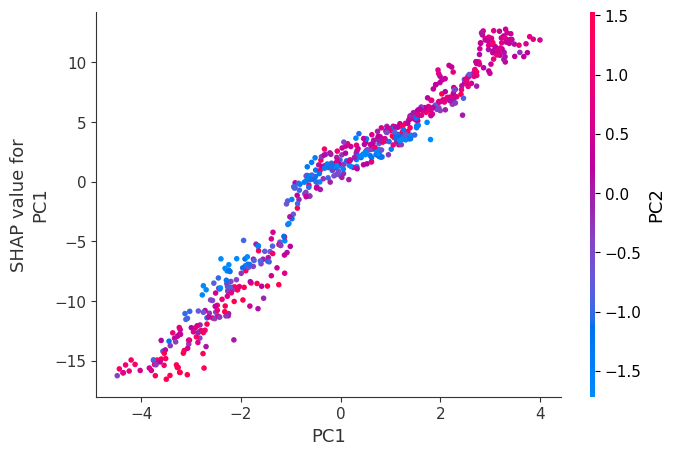

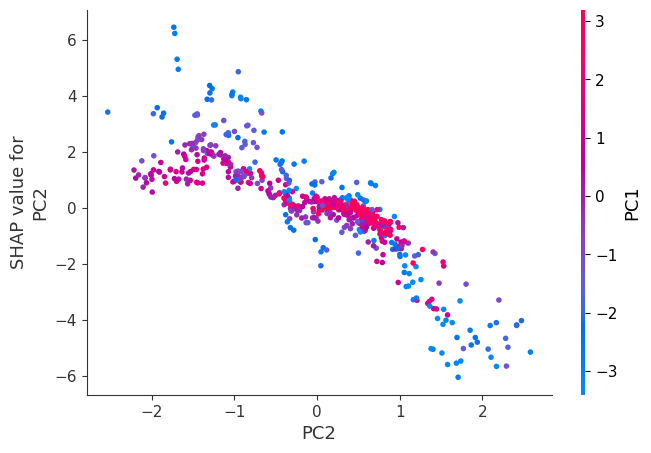

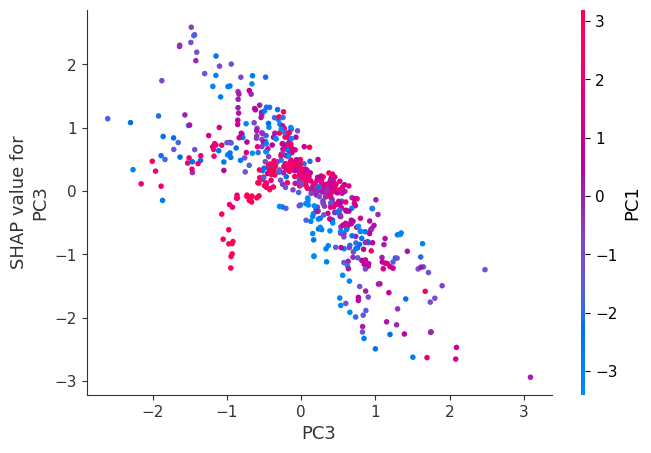

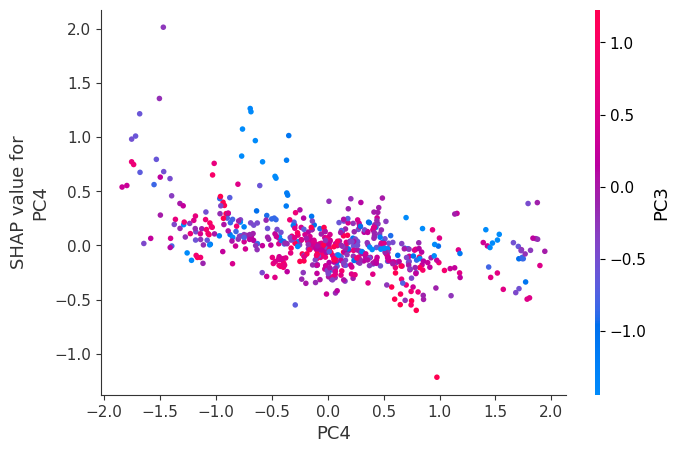

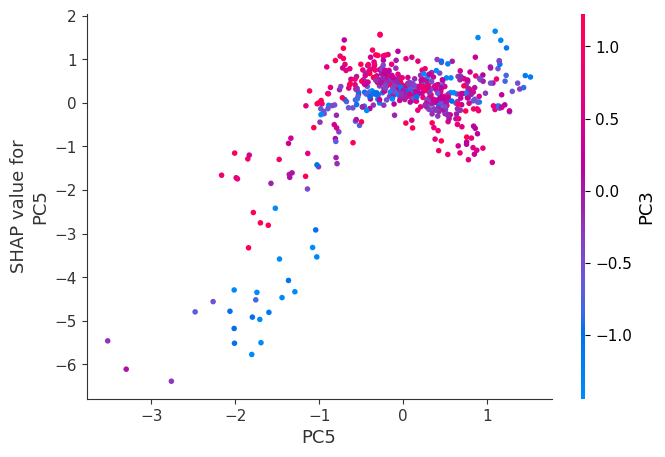

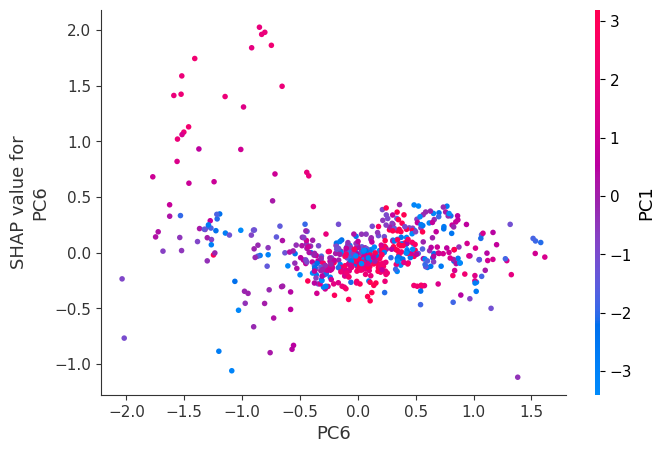

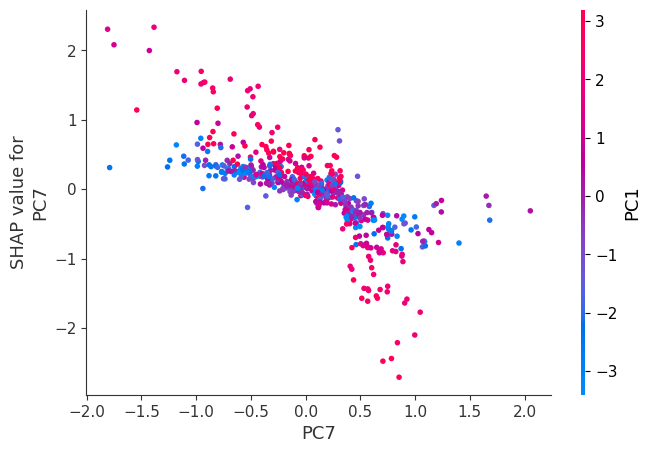

In [17]:
# Importance of Features
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(features_pca_df.shape[1]), importances[indices], align='center')
plt.xticks(range(features_pca_df.shape[1]), features_pca_df.columns[indices], rotation=90)
plt.show()

# SHAP Values ​​for interpretation
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Dependence plot
for feature in features_pca_df.columns:
    shap.dependence_plot(feature, shap_values, X_test)

# View an individual tree
from sklearn.tree import export_graphviz
import graphviz

# Export a tree from the Random Forest model
tree = best_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=features_pca_df.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")
graph


### Advantages of the Random Forest Model

1. **High Importance of the Main Feature:**
   - **Simplicity**: A feature with such high importance simplifies the model's interpretation since this variable plays a central role in predictions.
   - **Performance**: If this feature is highly predictive, the model might have good overall performance, especially if the correlation between this feature and the target is strong and consistent.

2. **Robustness and Stability:**
   - **Combination of Trees**: Random Forest combines multiple decision trees, which tends to reduce overfitting and increase the model's robustness.
   - **Noise Resistance**: By combining several trees, the model is less susceptible to data noise.

3. **Generalization:**
   - **Diversity of Trees**: Training multiple trees on different subsets of data and with different subsets of features can help the model generalize better to unseen data.

### Disadvantages of the Random Forest Model

1. **Overreliance on a Single Feature:**
   - **Vulnerability**: If the main feature, with an importance of almost 0.8, is removed, altered, or if its quality decreases, the model's performance may significantly drop.
   - **Limited Interpretation**: The model might be seen as overly dependent on a single feature, which can be a disadvantage if there are changes in the data over time.

2. **Complexity and Computational Resources:**
   - **Training Time**: Random Forest can be computationally intensive, especially with large datasets.
   - **Memory Resources**: It may require more memory to store all the trees and perform inferences.

### Recommendations

1. **Monitoring and Updating:**
   - **Continuous Maintenance**: Monitor the model's performance in production and be prepared to recalibrate the model as new information and data become available.
   - **Drift Analysis**: Periodically evaluate if there is data drift that could impact the model's performance.

2. **Testing on Different Data Sets:**
   - **Diverse Data Sets**: Test the model on different data sets to ensure it generalizes well across various scenarios and data distributions.
   - **Validation and Test Sets**: Use separate validation and test sets to evaluate the model's performance and prevent overfitting.

3. **Inclusion of New Data:**
   - **Continuous Data Integration**: Regularly include new data to keep the model updated and to capture any changes in patterns or trends.
   - **Data Augmentation**: Consider techniques to augment the data set, which can improve the robustness and performance of the model.

4. **Addition of Different Features:**
   - **Feature Engineering**: Experiment with adding new features that might improve the model's performance. This includes creating new derived features, combining existing ones, or including external data sources.

5. **Re-testing Algorithms and Parameters:**
   - **Algorithm Exploration**: In the future, explore and test different algorithms to see if there are better-suited models for the data.
   - **Hyperparameter Tuning**: Continuously re-tune hyperparameters to optimize model performance as new data becomes available and as we gain more insights.
   - **Model Comparison**: Regularly compare the Random Forest model with other machine learning models to ensure we are using the best approach.

Among the graphs, we have SHAP (SHapley Additive exPlanations) values that represent the contribution of each principal component (PC) to the model's prediction. The main interpretations are:

- **PC1**: It has a wide distribution of SHAP values, indicating a significant influence on the model's predictions. High and low values of PC1 are associated with large changes in predictions.
- **PC2, PC3, PC5, PC7**: They also have notable distributions, although with less amplitude than PC1.
- **PC4, PC6**: They have less impact on the model, as indicated by the smaller dispersion of SHAP values.

The colors represent the feature values (blue for low values and pink for high values). For example, for PC1, both high and low values seem to significantly affect the predictions.

We have a graph showing the feature importance in the Random Forest model. The interpretation is:

- **PC1**: It is by far the most important feature, with an importance close to 0.8.
- **PC2**: It has significantly lower importance but is still relevant.
- **PC5, PC3, PC7, PC6, PC4**: They have decreasing importance, indicating a lesser influence on the model's performance.

### Model Metrics

- **RMSE (Root Mean Squared Error)**: 2.2045176434279035
  - This metric indicates the square root of the mean squared error. An RMSE of approximately 2.22 suggests that the average difference between the predicted and actual values is about 2.22 units of life expectancy.

- **MAE (Mean Absolute Error)**: 1.4503757693119415
  - This metric indicates the mean absolute error. An MAE of approximately 1.45 suggests that the average difference between the predicted and actual values is about 1.45 units of life expectancy.

- **R² (Coefficient of Determination)**: 0.9438158194197083
  - This metric indicates the proportion of variance in the dependent data that is predictable from the independent data. An R² of approximately 0.943 suggests that about 94.3% of the variability in life expectancy can be explained by the model.

### Conclusion

- **Principal Component 1 (PC1)** is the most important feature and has a significant impact on the model's predictions.
- **PC2, PC5, PC3, PC7, PC6, PC4** also contribute to the predictions but with less impact.
- The model's performance is very good, with an R² of 0.943, indicating that the model explains the variability in the life expectancy data well. The error metrics (RMSE and MAE) are relatively low, suggesting that the predictions are close to the actual values.

### Points to Consider

#### Overfitting

- **Possible Problem**:
  - **Sign of Overfitting**: A very high R² in the training set and significantly lower in the test set may indicate overfitting, where the model is learning the training data very well but does not generalize well to new data.

#### Excessive Importance of a Single Feature (PC1)

- **Possible Problem**:
  - **Excessive Dependence**: The very high importance of PC1 may suggest that the model relies too much on a single feature, which could be a risk if this feature is noisy or not generalizable.

### Conclusion

The model has good apparent performance but should be tested on other datasets different from those used for training and testing. Additionally, in the future, with the acquisition of new data and features, it would be interesting to redesign the model to make it more generalizable and robust, and not rely exclusively on a single feature from the dataset.

#### 4. Model Implementation

- Save the trained model for future use.

##### Code summary

The `save_model` function is designed to save a pre-trained machine learning model to a file using the Joblib library. This is valuable because it allows the model to be stored persistently and reused later without the need to retrain it. The `model` parameter represents the trained model to be saved, and `filename` specifies the path where the model will be stored. During execution, the function attempts to save the model using `joblib.dump()` and prints a message indicating successful saving. If an error occurs during this process, it catches the exception and prints an error message with details of the encountered issue. This method is crucial for efficiently sharing models with others or integrating them into production systems.

In [18]:
def save_model(model, filename):
    """
    Save a trained machine learning model to a file using Joblib.

    Parameters:
    model: The trained model to be saved.
    filename: The path to the file where the model will be saved.
    """
    try:
        joblib.dump(model, filename)
        print(f"Model saved to {filename}")
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")
        
# Save the trained model
save_model(best_model, "random_forest_model.joblib")

Model saved to random_forest_model.joblib
